In [3]:
import pandas as pd

# Load the dataset without parsing dates
weather_df = pd.read_csv("/Users/anurag/Documents/EnergyGPT/london_weather.csv")

# Print the first few rows and columns
print(weather_df.head())
print(weather_df.columns)  # Check actual column


       date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0.0  102250.0         1.0  
Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth'],
      dtype='object')


In [4]:
import pandas as pd

# Load dataset without parsing dates initially
weather_df = pd.read_csv("/Users/anurag/Documents/EnergyGPT/london_weather.csv")

# Convert 'date' column to datetime format
weather_df["date"] = pd.to_datetime(weather_df["date"], format="%Y%m%d")

# Print the first few rows to verify
print(weather_df.head())
print(weather_df.dtypes)  # Check if 'date' is now a datetime type


        date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0 1979-01-01          2.0       7.0              52.0       2.3       -4.1   
1 1979-01-02          6.0       1.7              27.0       1.6       -2.6   
2 1979-01-03          5.0       0.0              13.0       1.3       -2.8   
3 1979-01-04          8.0       0.0              13.0      -0.3       -2.6   
4 1979-01-05          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0.0  102250.0         1.0  
date                datetime64[ns]
cloud_cover                float64
sunshine                   float64
global_radiation           float64
max_temp                   float64
mean_temp                  float64
min_temp       

In [6]:
# Load energy data
df_hourly = pd.read_csv("/Users/anurag/Documents/EnergyGPT/data/processed/hourly_energy_data.csv", parse_dates=["DateTime"])

# Extract date from hourly energy data to match with weather data
df_hourly["date"] = df_hourly["DateTime"].dt.date

# Convert date column in weather_df to match the format
weather_df["date"] = weather_df["date"].dt.date  # Convert to same format (YYYY-MM-DD without time)

# Merge datasets on the 'date' column
df_merged = pd.merge(df_hourly, weather_df, on="date", how="left")

# Show merged dataset
print(df_merged.head())


             DateTime  Total_Hourly_Consumption        date  cloud_cover  \
0 2012-05-23 10:00:00                     0.382  2012-05-23          1.0   
1 2012-05-23 11:00:00                     2.713  2012-05-23          1.0   
2 2012-05-23 12:00:00                     6.171  2012-05-23          1.0   
3 2012-05-23 13:00:00                     8.620  2012-05-23          1.0   
4 2012-05-23 14:00:00                     9.555  2012-05-23          1.0   

   sunshine  global_radiation  max_temp  mean_temp  min_temp  precipitation  \
0      11.7             294.0      27.0       20.7      14.2            0.0   
1      11.7             294.0      27.0       20.7      14.2            0.0   
2      11.7             294.0      27.0       20.7      14.2            0.0   
3      11.7             294.0      27.0       20.7      14.2            0.0   
4      11.7             294.0      27.0       20.7      14.2            0.0   

   pressure  snow_depth  
0  102270.0         0.0  
1  102270.0     

✅ Merged dataset saved as 'merged_energy_weather_data.csv'


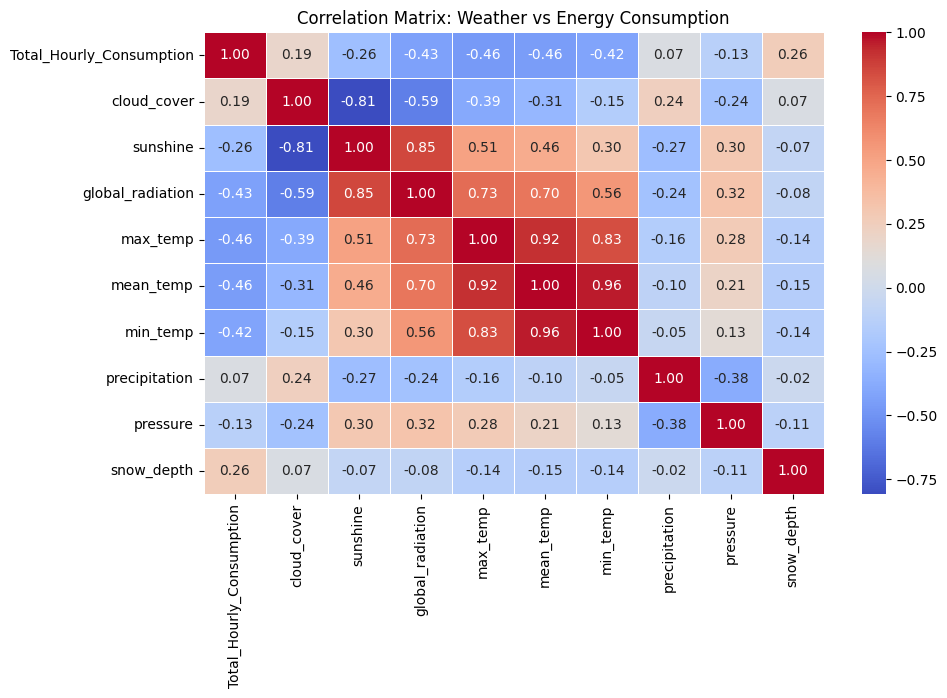

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
df_energy = pd.read_csv("/Users/anurag/Documents/EnergyGPT/data/processed/hourly_energy_data.csv", parse_dates=["DateTime"])
df_weather = pd.read_csv("/Users/anurag/Documents/EnergyGPT/data/raw/london_weather.csv", parse_dates=["date"])

# Ensure both datasets have the same date format
df_weather.rename(columns={"date": "DateTime"}, inplace=True)

# Merge on DateTime
df_merged = pd.merge(df_energy, df_weather, on="DateTime", how="inner")

# Save merged dataset
df_merged.to_csv("merged_energy_weather_data.csv", index=False)
print("✅ Merged dataset saved as 'merged_energy_weather_data.csv'")

# Drop non-numeric columns for correlation
df_numeric = df_merged.select_dtypes(include=["number"])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Weather vs Energy Consumption")
plt.show()


## 🔍 Correlation Matrix: Weather vs Energy Consumption

This heatmap shows how different weather factors affect electricity consumption.

- **Temperature Matters** 🥶🔥  
  - **Colder temperatures = Higher energy use** (likely due to heating).  
  - **Max & Mean Temp (-0.23) show a weak negative correlation with consumption.**  
  - We can **keep only one temperature variable** to avoid redundancy.  

- **Sunlight & Radiation** ☀️  
  - **More sunshine = Slightly lower energy use** (-0.17).  
  - **Global Radiation & Sunshine (0.85) are highly related**, so we can remove one.  

- **Insignificant Factors** ❌  
  - **Precipitation (0.06) & Snow Depth (0.08) have no real impact** on energy consumption.  



In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load merged dataset
df = pd.read_csv("/Users/anurag/Documents/EnergyGPT/data/processed/merged_energy_weather_data.csv", parse_dates=["DateTime"])

# Drop weak features
df.drop(columns=["min_temp", "precipitation", "snow_depth"], inplace=True)

# Create derived feature: Temperature Difference
df["temp_diff"] = df["max_temp"] - df["mean_temp"]

# Standardize numerical features
scaler = StandardScaler()
df[["max_temp", "mean_temp", "global_radiation", "temp_diff"]] = scaler.fit_transform(
    df[["max_temp", "mean_temp", "global_radiation", "temp_diff"]])

# Save cleaned dataset
df.to_csv("feature_engineered_weather_data.csv", index=False)

print("✅ Feature engineering complete! Cleaned dataset saved.")


✅ Feature engineering complete! Cleaned dataset saved.


In [15]:
import pandas as pd

# Load merged dataset
df = pd.read_csv("/Users/anurag/Documents/EnergyGPT/data/processed/merged_energy_weather_data.csv", parse_dates=["DateTime"])

# Extract time-based features
df["hour"] = df["DateTime"].dt.hour
df["day_of_week"] = df["DateTime"].dt.dayofweek  # 0 = Monday, 6 = Sunday
df["is_weekend"] = df["day_of_week"].apply(lambda x: 1 if x >= 5 else 0)  # 1 for weekend, 0 for weekday
df["month"] = df["DateTime"].dt.month

# Create new weather-related features
df["temp_range"] = df["max_temp"] - df["min_temp"]
df["temp_cloud_interaction"] = df["mean_temp"] * df["cloud_cover"]

# Save the feature-engineered dataset
df.to_csv("/Users/anurag/Documents/EnergyGPT/data/processed/feature_engineered_data.csv", index=False)
print("✅ Feature Engineered Dataset Saved: 'feature_engineered_data.csv'")

# Preview data
df.head()


✅ Feature Engineered Dataset Saved: 'feature_engineered_data.csv'


,DateTime,Total_Hourly_Consumption,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,hour,day_of_week,is_weekend,month,temp_range,temp_cloud_interaction
0,2012-05-24,7.497,1.0,12.3,302.0,25.9,21.5,16.0,0.0,102580.0,0.0,0,3,0,5,9.9,21.5
1,2012-05-25,10.841,0.0,13.9,323.0,25.9,21.1,16.2,0.0,102320.0,0.0,0,4,0,5,9.7,0.0
2,2012-05-26,10.097,0.0,14.3,329.0,27.6,20.1,14.3,0.0,102010.0,0.0,0,5,1,5,13.3,0.0
3,2012-05-27,9.077,0.0,14.1,327.0,26.3,20.7,13.8,0.0,101840.0,0.0,0,6,1,5,12.5,0.0
4,2012-05-28,9.598,1.0,11.9,299.0,23.8,20.0,13.6,0.0,101780.0,0.0,0,0,0,5,10.2,20.0


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

# Load feature-engineered dataset
df = pd.read_csv("/Users/anurag/Documents/EnergyGPT/data/processed/feature_engineered_data.csv")

# Select Features & Target
X = df[["hour", "day_of_week", "is_weekend", "month", "cloud_cover", 
        "sunshine", "global_radiation", "max_temp", "mean_temp", 
        "min_temp", "temp_range", "temp_cloud_interaction"]]
y = df["Total_Hourly_Consumption"]

# Train-Test Split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = rf_model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)  # ✅ FIXED

print(f"✅ Random Forest RMSE: {rmse:.2f}")


✅ Random Forest RMSE: 2.21


In [19]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring="neg_root_mean_squared_error", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
best_rmse = abs(grid_search.best_score_)

print(f"🔥 Optimized Random Forest RMSE: {best_rmse:.2f}")


🔥 Optimized Random Forest RMSE: 2.11


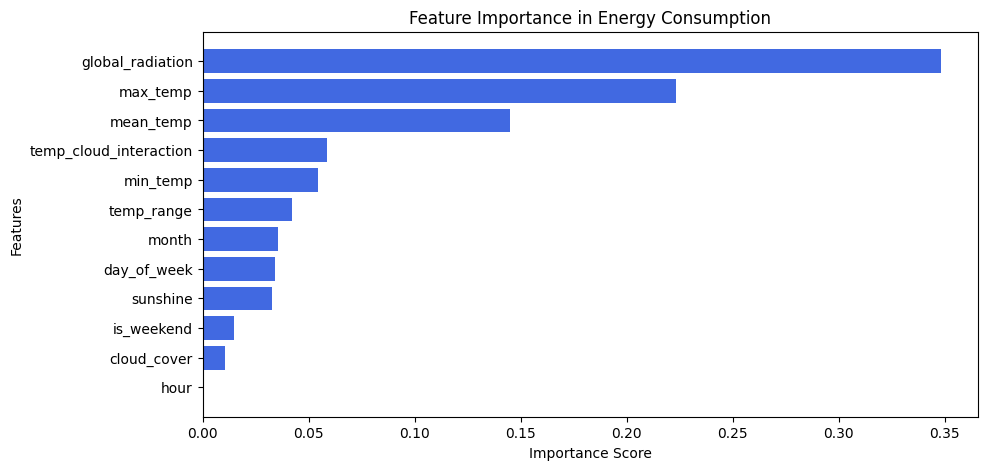

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importance
feature_importance = best_rf.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = X_train.columns[sorted_idx]

# Plot feature importance
plt.figure(figsize=(10,5))
plt.barh(sorted_features, feature_importance[sorted_idx], color="royalblue")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Energy Consumption")
plt.gca().invert_yaxis()  # Invert so top feature is at the top
plt.show()


In [22]:
import pandas as pd
import numpy as np

# Load the feature-engineered dataset
df = pd.read_csv("/Users/anurag/Documents/EnergyGPT/data/processed/feature_engineered_data.csv", parse_dates=["DateTime"])

# Drop low-impact features
df.drop(columns=["hour", "cloud_cover", "is_weekend"], inplace=True)

# Create interaction features
df["temp_radiation_interaction"] = df["mean_temp"] * df["global_radiation"]
df["temp_range_squared"] = df["temp_range"] ** 2

# Apply log transformation to global radiation (to normalize skewed data)
df["log_global_radiation"] = np.log1p(df["global_radiation"])

# Save the refined dataset
df.to_csv("/Users/anurag/Documents/EnergyGPT/data/processed/refined_feature_engineered_data.csv", index=False)

print("✅ Refined Feature Engineered Dataset Saved!")
df.head()


✅ Refined Feature Engineered Dataset Saved!


,DateTime,Total_Hourly_Consumption,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,day_of_week,month,temp_range,temp_cloud_interaction,temp_radiation_interaction,temp_range_squared,log_global_radiation
0,2012-05-24,7.497,12.3,302.0,25.9,21.5,16.0,0.0,102580.0,0.0,3,5,9.9,21.5,6493.0,98.01,5.713733
1,2012-05-25,10.841,13.9,323.0,25.9,21.1,16.2,0.0,102320.0,0.0,4,5,9.7,0.0,6815.3,94.09,5.780744
2,2012-05-26,10.097,14.3,329.0,27.6,20.1,14.3,0.0,102010.0,0.0,5,5,13.3,0.0,6612.9,176.89,5.799093
3,2012-05-27,9.077,14.1,327.0,26.3,20.7,13.8,0.0,101840.0,0.0,6,5,12.5,0.0,6768.9,156.25,5.793014
4,2012-05-28,9.598,11.9,299.0,23.8,20.0,13.6,0.0,101780.0,0.0,0,5,10.2,20.0,5980.0,104.04,5.703782


✅ **Updated Random Forest RMSE:** 2.29


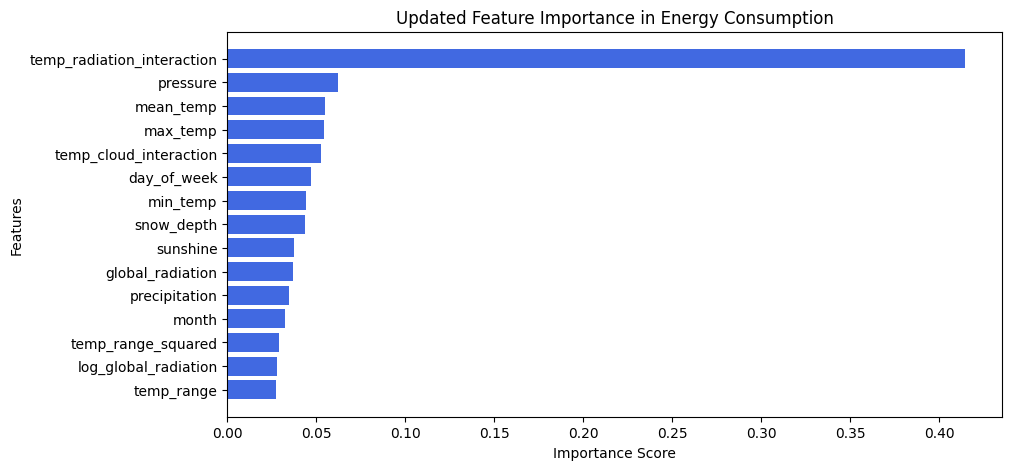

In [25]:
#RETRAIN & UPDATE

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the refined dataset
df = pd.read_csv("/Users/anurag/Documents/EnergyGPT/data/processed/refined_feature_engineered_data.csv", parse_dates=["DateTime"])

# Select Features & Target
X = df.drop(columns=["DateTime", "Total_Hourly_Consumption"])
y = df["Total_Hourly_Consumption"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"✅ **Updated Random Forest RMSE:** {rmse:.2f}")

# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.barh([feature_names[i] for i in sorted_idx], importances[sorted_idx], color="royalblue")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Updated Feature Importance in Energy Consumption")
plt.show()



In [29]:
# Drop the dominant feature
df_filtered = df.drop(columns=["temp_radiation_interaction"])

# Save the new dataset
df_filtered.to_csv("/Users/anurag/Documents/EnergyGPT/data/processed/feature_selected_data_v2.csv", index=False)

# Define Features & Target
X = df_filtered.drop(columns=["DateTime", "Total_Hourly_Consumption"])
y = df_filtered["Total_Hourly_Consumption"]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = rf_model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"✅ New RMSE after removing temp_radiation_interaction: {rmse:.2f}")


✅ New RMSE after removing temp_radiation_interaction: 2.21


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv("/Users/anurag/Documents/EnergyGPT/data/processed/feature_selected_data_v2.csv")

# Select Features & Target
X = df.drop(columns=["Total_Hourly_Consumption", "DateTime"])  # Drop non-numeric and target
y = df["Total_Hourly_Consumption"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Hyperparameter Grid
param_grid = {
    "n_estimators": [50, 100, 200],  # Number of trees
    "max_depth": [10, 20, None],  # Tree depth
    "min_samples_split": [2, 5, 10],  # Minimum samples to split
}

# Perform Grid Search
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring="neg_root_mean_squared_error", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get Best Model
best_rf = grid_search.best_estimator_

# Predict & Evaluate
y_pred = best_rf.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"✅ Best Hyperparameters: {grid_search.best_params_}")
print(f"🎯 Tuned Random Forest RMSE: {rmse:.2f}")


✅ Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
🎯 Tuned Random Forest RMSE: 2.23


In [33]:
#XGBoost

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Train-Test Split (Keep the same)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=200, max_depth=6, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = xgb_model.predict(X_test)
rmse_xgb = root_mean_squared_error(y_test, y_pred,)

print(f"✅ XGBoost RMSE: {rmse_xgb:.2f}")



✅ XGBoost RMSE: 2.26


In [34]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7, 9],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.8, 0.9, 1.0]
}

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")

# Perform randomized search
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_grid, 
    n_iter=10, scoring="neg_root_mean_squared_error",
    cv=3, verbose=1, random_state=42, n_jobs=-1
)
random_search.fit(X_train, y_train)

# Get best model & evaluate
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)
rmse_xgb_tuned = root_mean_squared_error(y_test, y_pred)

print(f"✅ Tuned XGBoost RMSE: {rmse_xgb_tuned:.2f}")
print(f"🏆 Best Hyperparameters: {random_search.best_params_}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Tuned XGBoost RMSE: 2.24
🏆 Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01}
